In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

from matplotlib.ticker import MaxNLocator

In [62]:
def structure_data(date, date_str, dataframe):
    data = dataframe[dataframe['date'].str.contains(date_str)]
    
    time = data['date'].tolist()
    date_time=[]
    for t in range(len(time)):
        datatime_str = time[t]
        datetime_obj = datetime.strptime(datatime_str,'%m/%d/%Y %H:%M')
        date_time.append(datetime_obj)
        
    data['date_time']= date_time
    data = data.sort_values(by=['sensor_v2.agg_tag','date_time'])
    data = data.groupby(['sensor_v2.agg_tag','date_time']).mean()
    
    times = pd.date_range("{} 00:00:00".format(date), "{} 23:59:00".format(date) , freq="1min")
    df_None = pd.DataFrame(columns=['sensor{}'.format(i) for i in range(1,34) if i%2==0], index=times)
    
    for i in range(2,34,2):
        df_None['sensor{}'.format(i)] = data['sensor_v2.density'][i]
        
    return df_None

In [63]:
df = pd.read_csv('data/2019-11-(4-8).csv')

In [64]:
for i in range(4,9):
    d1 = '2019-11-0{}'.format(i)
    d2 = '11/{}/2019'.format(i)
    df5 = structure_data(d1, d2, df)
    df5.to_csv('day{}.csv'.format(i))

KeyError: 2

In [37]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

In [38]:
def interpolation(km, Row_ind):
    y= np.array(Row_ind)
    nans, x= nan_helper(y)
    y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    p4 = np.poly1d(np.polyfit(km, y, 10))
    row = [p4(i*100) for i in range(307)]
    return row

In [39]:
def data_plot(day, df):
    km = [0,1300,3000,5100,6955,9310,11320,13220,15590,17825,19920,21335,23255,25375,28020,30620]
    # Create an empty list 
    Row_list =[] 
    times = pd.date_range("2019-11-0{} 00:00:00".format(day), "2019-11-0{} 23:59:00".format(day), freq="1min")   
    df_None = pd.DataFrame(columns=[i*100 for i in range(307)], index=times)
    
    # Iterate over each row 
    for index, rows in df.iterrows(): 
        # Create list for the current row 
        my_list =[rows['sensor{}'.format(i)] for i in range(1,34) if i%2==0] 

        # append the list to the final list 
        Row_list.append(my_list) 
        
    for i, t in enumerate(times):
        row_int = interpolation(km, Row_list[i])
        df_None.loc[t] = row_int
    
    df_None[df_None < 0] = 0
    return df_None

In [40]:
def plot(day, df):
    Z = df.to_numpy().transpose()
    y = np.arange(307)
    x = np.arange(1440)
    X, Y = np.meshgrid(x,y)
    cmap = plt.get_cmap('viridis')
    
    levels = MaxNLocator(nbins=15).tick_values(Z.min(), Z.max())
    fig = plt.figure()
    ax1 = plt.contourf(X, Y, Z, levels=levels, cmap=cmap)
    plt.colorbar(ax1)
    plt.ylabel('sensor index')
    plt.xlabel('time(minute)')
    plt.title('day{}'.format(day))
    plt.savefig('day{}.png'.format(day))
    plt.show()

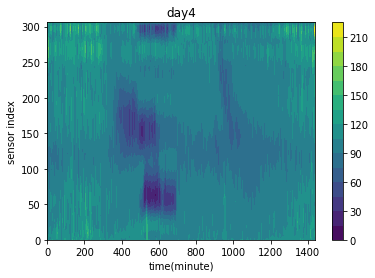

In [41]:
day4 = pd.read_csv('day4.csv')
day4_plot = data_plot(4, day4)
plot(4,day4_plot)

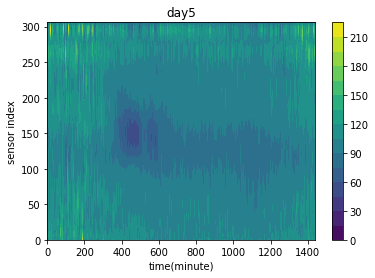

In [42]:
day5 = pd.read_csv('day5.csv')
day5_plot = data_plot(5, day5)
plot(5,day5_plot)

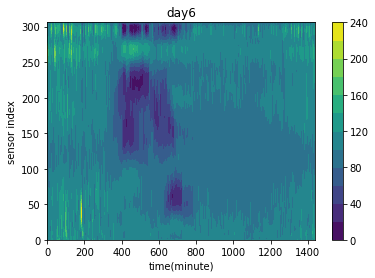

In [43]:
day6 = pd.read_csv('day6.csv')
day6_plot = data_plot(6, day6)
plot(6,day6_plot)

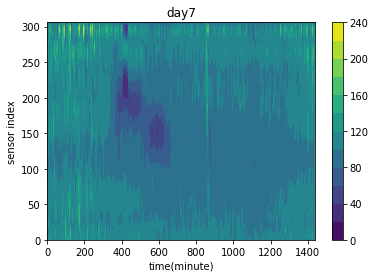

In [44]:
day7 = pd.read_csv('day7.csv')
day7_plot = data_plot(7, day7)
plot(7,day7_plot)

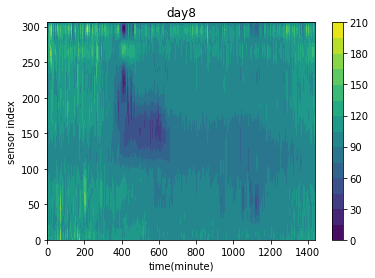

In [45]:
day8 = pd.read_csv('day8.csv')
day8_plot = data_plot(8, day8)
plot(8,day8_plot)